<h4>The Bootstrap</h4>
If I write down the results of flipping a coin 100 times, randomly selecting these entries is a good substitute for flipping the coin.
The bootstrap is a method for finding $\hat{\theta}$ an estimate of the parameter $\theta$ of an unknown cumulative distribution $F$. It does this by sampling from the cumulative empirical distribution $\hat{F}$ which is constructed using $n$ samples from $F$ as such:

$$ \hat{F_x} = \frac{1}{n} \sum_{i=1}^n 1_{x_i \le x} $$

Why should we trust it? What kind of estimator is it?
$$ n \hat{F}_x= Binom(n, F(x)) $$
It is unbiased.
$$ E [ \hat{F}_{x} ] = F(x) $$
With variance:
$$ \sigma^2 = Var [ \hat{F}_{x} ] = nF(x)(1-F(x)) $$
Thus assuming IID draws and using the central limit theorem:
$$ \hat{F}_{x} - F(x) = N(0, \frac{\sigma}{\sqrt{n}}) $$

The idea is with $F \approx \hat{F}$ we sample from $\hat{F}$ to give us analytically difficult $\hat{\theta}$.

The simplest way to sample $\hat{F}$ is to simply draw with replacement from our $x_i$.

I am not sure why we don't use the CDF and why the properties above still apply doing this resampling.

Lets try this where we are trying to estimate standard error of an estimate.

In [199]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline     

/Users/deanpospisil/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in double_scalars


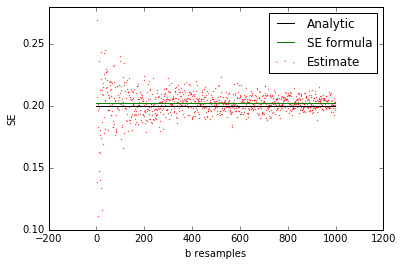

(0, 1)

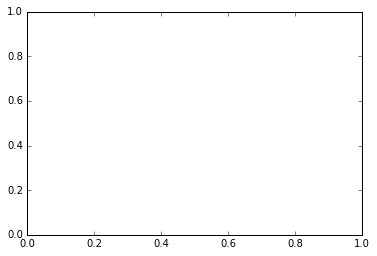

In [526]:
def se_mean_boot(x, b):
    n = len(x)
    x_star = np.random.choice(x, size=(n, b))
    theta_star_means = np.sum(x_star, 0, keepdims=1)/float(n)
    theta_star_gmean = np.sum(theta_star_means, keepdims=1)/float(b)
    se_b = np.sum(np.square(theta_star_means - theta_star_gmean))/(float(b-1))
    se_b = np.sqrt(se_b)
    return se_b

n = 100
b_s = np.arange(1,1000)
sigma = 2.
x = np.random.normal(0, scale=sigma, size=n)


an_se = sigma/(float(n)**0.5)
an_se_samp = np.std(x)/np.sqrt(n)

se_b_s = [se_mean_boot(x, b) for b in b_s]
    
plt.plot([0, max(b_s)],[an_se, an_se], color='k')
plt.plot([0, max(b_s)],[an_se_samp, an_se_samp], color='g')

plt.scatter(b_s, se_b_s, s=0.1, color = 'r')
plt.xlabel('b resamples');plt.ylabel('SE')
plt.legend(['Analytic', 'SE formula', 'Estimate']);plt.show()
plt.ylim(0,1)

In [502]:
n = 20
b = 1000
sigma = 2
x = np.random.normal(0, scale=sigma, size=n)

se_b = se_mean_boot(x, b)
se_est = np.std(x)/np.sqrt(n)

print(se_b)
print(se_est)
test_rep = 100
x_test = np.random.normal(0, scale=sigma, size=(test_rep, n))
abs_est = np.abs(np.mean(x_test,1))
p_b = np.sum(abs_est<se_b)/test_rep
p_an = np.sum(abs_est<se_est)/test_rep

print('Boot '+str(p_b))
print('SE ' + str(p_an))


0.301903145056
0.300901900667
Boot 0.41
SE 0.41


In [7]:


def corr(a, b):
    a -= np.mean(a);b -= np.mean(b)
    r=np.dot(a,b)/((np.sum(a**2)**0.5)*(np.sum(b**2)**0.5))
    return r

pi = np.pi
n_reps = 100
n_samples = 100
n_phase = 10

noise = np.random.uniform(size=(n_reps, n_samples, n_phase))

phase_shift = np.linspace(0, pi/2. - (pi/2)/n_phase, n_phase
                         ).reshape(1, 1, n_phase)
t = np.linspace(0, 2*pi-2*pi/n_samples, n_samples
               ).reshape(n_samples,1,1)

a = np.cos(t)
b = np.cos(phase_shift + t) + noise
print(a.shape)
print(b.shape)

(100, 1, 1)
(100, 100, 10)


In [1]:
'''
n_iter = 1000

_ = plt.hist(b, histtype='step', bins=100)
plt.xlim(-0.5, 0.5)
plt.show()

corr_shuffle = [corr(a, np.random.choice(b, size=b.shape)) for i in range(n_iter)]
_ = plt.hist(corr_shuffle, histtype='step', bins=100)
plt.xlim(-0.5, 0.5)
plt.show()

gaussian_shuffle = [corr(a, np.random.normal(size=b.shape)) for i in range(n_iter)]
_ = plt.hist(gaussian_shuffle, histtype='step', bins=100)
plt.xlim(-0.5, 0.5)
plt.show()
'''

/Users/deanpospisil/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/deanpospisil/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:19: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/deanpospisil/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:21: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


"\nn_iter = 1000\n\n_ = plt.hist(b, histtype='step', bins=100)\nplt.xlim(-0.5, 0.5)\nplt.show()\n\ncorr_shuffle = [corr(a, np.random.choice(b, size=b.shape)) for i in range(n_iter)]\n_ = plt.hist(corr_shuffle, histtype='step', bins=100)\nplt.xlim(-0.5, 0.5)\nplt.show()\n\ngaussian_shuffle = [corr(a, np.random.normal(size=b.shape)) for i in range(n_iter)]\n_ = plt.hist(gaussian_shuffle, histtype='step', bins=100)\nplt.xlim(-0.5, 0.5)\nplt.show()\n"